# _**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

## Venuka

In [135]:
import requests
import pandas as pd
import os

def fetch_data(base_url, dataset, api_key, num_records=99, offset=0):
    all_records = []
    max_offset = 9900  # Maximum number of requests

    while True:
        # maximum limit check
        if offset > max_offset:
            break

        # Create API request URL
        filters = f'{dataset}/records?limit={num_records}&offset={offset}'
        url = f'{base_url}{filters}&api_key={api_key}'

        # Start request
        try:
            result = requests.get(url, timeout=10)
            result.raise_for_status()
            records = result.json().get('results')
        except requests.exceptions.RequestException as e:
            raise Exception(f"API request failed: {e}")
        if records is None:
            break
        all_records.extend(records)
        if len(records) < num_records:
            break

        # next cycle offset
        offset += num_records

    # DataFrame all data
    df = pd.DataFrame(all_records)
    return df

API_KEY = os.environ.get('MELBOURNE_API_KEY', input("Please enter your API key: "))
BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'

Please enter your API key:  a0d28c08580df90345c0c34846cf94b614eb5071d598c3b885237828


In [136]:
# data set name
bench_usage_data = 'guppy'

bench_usage_df = fetch_data(BASE_URL, bench_usage_data, API_KEY)

bench_usage_df

,time,sensor_location,dev_id,sensor_name,azimuthdeg,lat_long,batv,intrip,inclinationdeg,mandown,temp,type,xyz
0,2022-05-03T06:16:12+00:00,Seat Asset ID: 1119051,guppy-2340,Bench Sensor 3,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.728,0.0,None,None,20.0,status,None
1,2022-05-04T09:50:17+00:00,Seat Asset ID: 1119882,guppy-2332,Bench Sensor 2,None,"{'lon': 144.9655868, 'lat': -37.8027388}",2.756,1.0,None,None,11.0,status,None
2,2022-05-04T13:47:05+00:00,Seat Asset ID: 1119882,guppy-2332,Bench Sensor 2,None,"{'lon': 144.9655868, 'lat': -37.8027388}",2.756,1.0,None,None,8.0,status,None
3,2022-05-05T01:51:45+00:00,Seat Asset ID: 1119051,guppy-230f,Bench Sensor 4,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.784,0.0,None,None,13.0,status,None
4,2022-05-05T01:52:53+00:00,Seat Asset ID: 1119051,guppy-230f,Bench Sensor 4,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.784,1.0,None,None,13.0,status,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2021-09-22T03:23:58+00:00,Seat Asset ID: 1119051,guppy-2340,Bench Sensor 3,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.896,1.0,None,None,20.0,status,None
9995,2021-09-22T03:20:13+00:00,Seat Asset ID: 1119051,guppy-230f,Bench Sensor 4,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.924,1.0,None,None,19.0,status,None
9996,2021-09-22T03:26:50+00:00,Seat Asset ID: 1119051,guppy-230f,Bench Sensor 4,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.924,0.0,None,None,20.0,status,None
9997,2021-09-22T03:32:22+00:00,Seat Asset ID: 1119882,guppy-2332,Bench Sensor 2,None,"{'lon': 144.9655868, 'lat': -37.8027388}",2.910,1.0,None,None,16.0,status,None


## Step 1: Preprocess the Data

In [137]:
# Print column names and data types for the bench_usage dataset
print("Bench Usage Data Columns and Types:")
print(bench_usage_df.dtypes)

# If you want to see just the column names:
print("\nBench Usage Data Column Names:")
print(bench_usage_df.columns)

Bench Usage Data Columns and Types:
time                object
sensor_location     object
dev_id              object
sensor_name         object
azimuthdeg          object
lat_long            object
batv               float64
intrip             float64
inclinationdeg      object
mandown             object
temp               float64
type                object
xyz                 object
dtype: object

Bench Usage Data Column Names:
Index(['time', 'sensor_location', 'dev_id', 'sensor_name', 'azimuthdeg',
       'lat_long', 'batv', 'intrip', 'inclinationdeg', 'mandown', 'temp',
       'type', 'xyz'],
      dtype='object')


In [138]:
print("Columns in bench_usage_df:", bench_usage_df.columns.tolist())

Columns in bench_usage_df: ['time', 'sensor_location', 'dev_id', 'sensor_name', 'azimuthdeg', 'lat_long', 'batv', 'intrip', 'inclinationdeg', 'mandown', 'temp', 'type', 'xyz']


In [139]:
# Check for missing values in 'latlong' column
missing_values_count = bench_usage_df['lat_long'].isna().sum()
print(f"Missing values in 'latlong': {missing_values_count}")

# Check for blank cells in 'latlong' column
blank_cells_count = bench_usage_df['lat_long'].str.strip().eq('').sum()
print(f"Blank cells in 'latlong': {blank_cells_count}")


Missing values in 'latlong': 0
Blank cells in 'latlong': 0


In [140]:
# Extract 'latitude' and 'longitude' from the dictionary in 'lat_long' column
bench_usage_df['latitude'] = bench_usage_df['lat_long'].apply(lambda x: x.get('latitude') if isinstance(x, dict) else None)
bench_usage_df['longitude'] = bench_usage_df['lat_long'].apply(lambda x: x.get('longitude') if isinstance(x, dict) else None)

# Display the first few rows to verify the new columns
print(bench_usage_df[['latitude', 'longitude']].head())


  latitude longitude
0     None      None
1     None      None
2     None      None
3     None      None
4     None      None


In [141]:
# Print the structure of a non-null 'lat_long' entry
non_null_entries = bench_usage_df['lat_long'].dropna()
if not non_null_entries.empty:
    print(non_null_entries.iloc[0])
else:
    print("No non-null entries found in 'lat_long'.")


{'lon': 144.9654266, 'lat': -37.8028278}


In [142]:
# Extract 'latitude' and 'longitude' from the dictionary in 'lat_long' column, using the correct keys
bench_usage_df['latitude'] = bench_usage_df['lat_long'].apply(lambda x: x.get('lat') if isinstance(x, dict) else None)
bench_usage_df['longitude'] = bench_usage_df['lat_long'].apply(lambda x: x.get('lon') if isinstance(x, dict) else None)

# Display the first few rows to verify the new columns
print(bench_usage_df[['latitude', 'longitude']].head())


    latitude   longitude
0 -37.802828  144.965427
1 -37.802739  144.965587
2 -37.802739  144.965587
3 -37.802828  144.965427
4 -37.802828  144.965427


In [143]:
print(bench_usage_df[['latitude', 'longitude']].head())


    latitude   longitude
0 -37.802828  144.965427
1 -37.802739  144.965587
2 -37.802739  144.965587
3 -37.802828  144.965427
4 -37.802828  144.965427


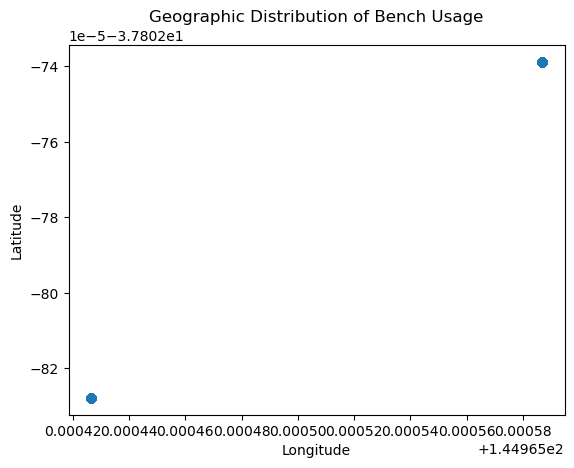

In [144]:
import matplotlib.pyplot as plt

plt.scatter(bench_usage_df['longitude'], bench_usage_df['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Bench Usage')
plt.show()


In [145]:
pip install geopandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [112]:
pip install contextily

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------  122.9/125.4 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/23.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/23.4 MB 3.6 MB/s eta 0:00:07
   ---------------------------------------- 0.3/23.4 MB 3.4 MB/s eta 0:00:07
    --------------------------------------- 0.4/23.4 MB 3.4 MB/s eta 0:00:07
    --------------------------------------- 0.6/23.4 MB 3.3 MB/s eta 0:00:07
   - -------------------------------------- 0.7/23.4 MB 3.4 MB/s eta 0:00:07
   - -------------------------------------- 0.9/23.4 MB 3.5 MB/s eta 0:00:07
   - -------------------------------------- 1.0/23.4 MB 3.5 MB/s eta 0:00:07
   -- ------------------------------------- 1.2/23.4 MB 3.4 MB/s eta 0:00:07
   --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [146]:
bench_usage_df

,time,sensor_location,dev_id,sensor_name,azimuthdeg,lat_long,batv,intrip,inclinationdeg,mandown,temp,type,xyz,latitude,longitude
0,2022-05-03T06:16:12+00:00,Seat Asset ID: 1119051,guppy-2340,Bench Sensor 3,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.728,0.0,None,None,20.0,status,None,-37.802828,144.965427
1,2022-05-04T09:50:17+00:00,Seat Asset ID: 1119882,guppy-2332,Bench Sensor 2,None,"{'lon': 144.9655868, 'lat': -37.8027388}",2.756,1.0,None,None,11.0,status,None,-37.802739,144.965587
2,2022-05-04T13:47:05+00:00,Seat Asset ID: 1119882,guppy-2332,Bench Sensor 2,None,"{'lon': 144.9655868, 'lat': -37.8027388}",2.756,1.0,None,None,8.0,status,None,-37.802739,144.965587
3,2022-05-05T01:51:45+00:00,Seat Asset ID: 1119051,guppy-230f,Bench Sensor 4,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.784,0.0,None,None,13.0,status,None,-37.802828,144.965427
4,2022-05-05T01:52:53+00:00,Seat Asset ID: 1119051,guppy-230f,Bench Sensor 4,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.784,1.0,None,None,13.0,status,None,-37.802828,144.965427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2021-09-22T03:23:58+00:00,Seat Asset ID: 1119051,guppy-2340,Bench Sensor 3,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.896,1.0,None,None,20.0,status,None,-37.802828,144.965427
9995,2021-09-22T03:20:13+00:00,Seat Asset ID: 1119051,guppy-230f,Bench Sensor 4,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.924,1.0,None,None,19.0,status,None,-37.802828,144.965427
9996,2021-09-22T03:26:50+00:00,Seat Asset ID: 1119051,guppy-230f,Bench Sensor 4,None,"{'lon': 144.9654266, 'lat': -37.8028278}",2.924,0.0,None,None,20.0,status,None,-37.802828,144.965427
9997,2021-09-22T03:32:22+00:00,Seat Asset ID: 1119882,guppy-2332,Bench Sensor 2,None,"{'lon': 144.9655868, 'lat': -37.8027388}",2.910,1.0,None,None,16.0,status,None,-37.802739,144.965587


In [147]:
# Remove the 'lat_long' column from the DataFrame
bench_usage_df = bench_usage_df.drop(columns=['lat_long'])

# Verify the column is removed by printing the first few rows of the DataFrame
print(bench_usage_df.head())

                        time         sensor_location      dev_id  \
0  2022-05-03T06:16:12+00:00  Seat Asset ID: 1119051  guppy-2340   
1  2022-05-04T09:50:17+00:00  Seat Asset ID: 1119882  guppy-2332   
2  2022-05-04T13:47:05+00:00  Seat Asset ID: 1119882  guppy-2332   
3  2022-05-05T01:51:45+00:00  Seat Asset ID: 1119051  guppy-230f   
4  2022-05-05T01:52:53+00:00  Seat Asset ID: 1119051  guppy-230f   

      sensor_name azimuthdeg   batv  intrip inclinationdeg mandown  temp  \
0  Bench Sensor 3       None  2.728     0.0           None    None  20.0   
1  Bench Sensor 2       None  2.756     1.0           None    None  11.0   
2  Bench Sensor 2       None  2.756     1.0           None    None   8.0   
3  Bench Sensor 4       None  2.784     0.0           None    None  13.0   
4  Bench Sensor 4       None  2.784     1.0           None    None  13.0   

     type   xyz   latitude   longitude  
0  status  None -37.802828  144.965427  
1  status  None -37.802739  144.965587  
2  status  

In [148]:
# Remove multiple columns from the DataFrame
columns_to_remove = ['azimuthdeg', 'inclinationdeg', 'mandown', 'type', 'xyz']
bench_usage_df = bench_usage_df.drop(columns=columns_to_remove)

# Verify the columns are removed by printing the first few rows of the DataFrame
print(bench_usage_df.head())


                        time         sensor_location      dev_id  \
0  2022-05-03T06:16:12+00:00  Seat Asset ID: 1119051  guppy-2340   
1  2022-05-04T09:50:17+00:00  Seat Asset ID: 1119882  guppy-2332   
2  2022-05-04T13:47:05+00:00  Seat Asset ID: 1119882  guppy-2332   
3  2022-05-05T01:51:45+00:00  Seat Asset ID: 1119051  guppy-230f   
4  2022-05-05T01:52:53+00:00  Seat Asset ID: 1119051  guppy-230f   

      sensor_name   batv  intrip  temp   latitude   longitude  
0  Bench Sensor 3  2.728     0.0  20.0 -37.802828  144.965427  
1  Bench Sensor 2  2.756     1.0  11.0 -37.802739  144.965587  
2  Bench Sensor 2  2.756     1.0   8.0 -37.802739  144.965587  
3  Bench Sensor 4  2.784     0.0  13.0 -37.802828  144.965427  
4  Bench Sensor 4  2.784     1.0  13.0 -37.802828  144.965427  


In [167]:
# Specify the path and file name for the CSV file you want to create
file_path = 'C:/Users/venuk/Downloads/1_df.csv'  # Adjust the path as needed

# Export the DataFrame to a CSV file
bench_usage_df.to_csv(file_path, index=False)

# If you need to provide a link to download the file (in a Jupyter environment, for example)
print(f"Data exported to {file_path}")


Data exported to C:/Users/venuk/Downloads/1_df.csv


In [151]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [155]:
# Create the Map Centered on Argyle Square
import folium

# Coordinates for Argyle Square
argyle_square_lat = -37.8036
argyle_square_lon = 144.9655

# Create a map centered around Argyle Square with a suitable zoom level
map = folium.Map(location=[argyle_square_lat, argyle_square_lon], zoom_start=17, tiles='CartoDB positron')

In [156]:
# Add Markers for All Latitude and Longitude Values
for index, row in bench_usage_df.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"Lat: {row['latitude']}, Lon: {row['longitude']}"
    ).add_to(map)

In [157]:
# Save the Map to an HTML File
map.save('argyle_square_benches_map.html')

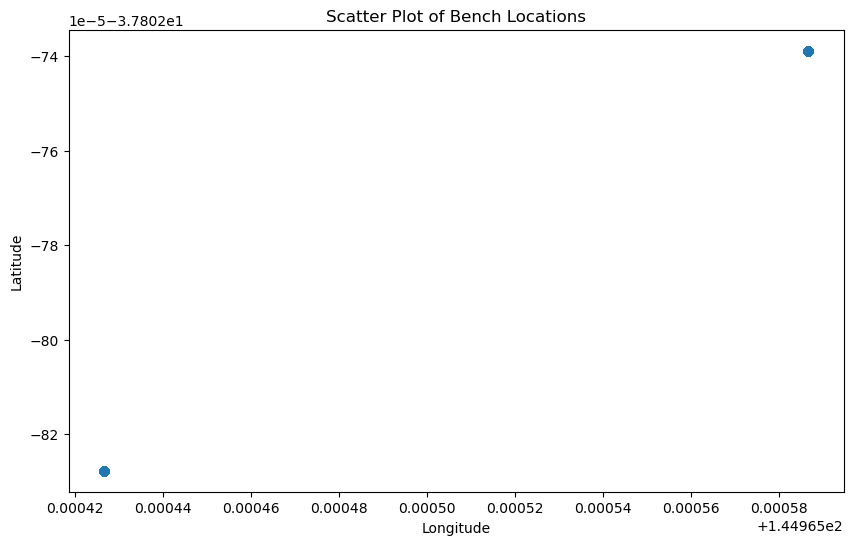

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(bench_usage_df['longitude'], bench_usage_df['latitude'], alpha=0.5)
plt.title('Scatter Plot of Bench Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [166]:
print(bench_usage_df[['latitude', 'longitude']].drop_duplicates().head())


    latitude   longitude
0 -37.802828  144.965427
1 -37.802739  144.965587


In [160]:
print(bench_usage_df[['latitude', 'longitude']].isnull().sum())


latitude     0
longitude    0
dtype: int64


In [161]:
print(bench_usage_df.describe())


              batv       intrip         temp     latitude    longitude
count  9857.000000  9857.000000  9857.000000  9999.000000  9999.000000
mean      2.877877     0.504109    15.785533   -37.802783   144.965507
std       0.117966     0.500008     5.555766     0.000045     0.000080
min       2.700000     0.000000     1.000000   -37.802828   144.965427
25%       2.756000     0.000000    12.000000   -37.802828   144.965427
50%       2.882000     1.000000    15.000000   -37.802828   144.965427
75%       2.924000     1.000000    19.000000   -37.802739   144.965587
max       3.106000     1.000000    37.000000   -37.802739   144.965587


In [162]:
test_map = folium.Map(location=[-37.8036, 144.9655], zoom_start=15)
folium.Marker(location=[-37.8036, 144.9655], popup='Sample Location').add_to(test_map)
test_map


In [5]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">{Use Case Name}</div>

<div class="usecase-authors"><b>Authored by: </b> {Author/s}</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```